In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

Importing the dependencies


In [26]:
#loading the diabetes to a pandas DataFrame
diabetes_dataset = pd.read_csv('./diabetes.csv')

In [27]:
#printing the first 5 rows of the dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Data Collection and analysis
Diabetes Data set (PIMA)


In [28]:
#number of rows and columns in this dataset
diabetes_dataset.shape

(768, 9)

In [29]:
# getting the statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [30]:
diabetes_dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In 'Outcome'
0 - Non- Dibetic
1 - Diabetic

In [8]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


Visualisation of the Plot

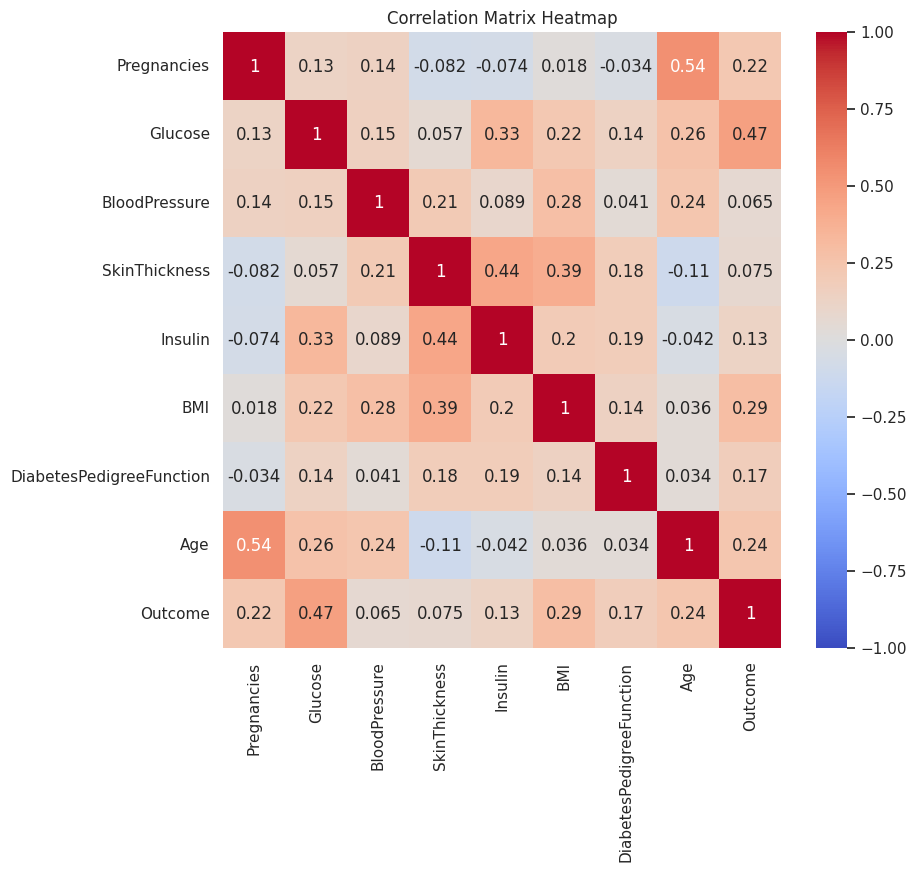

In [37]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(9, 8))
correlation_matrix = diabetes_dataset.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix Heatmap")
plt.show()

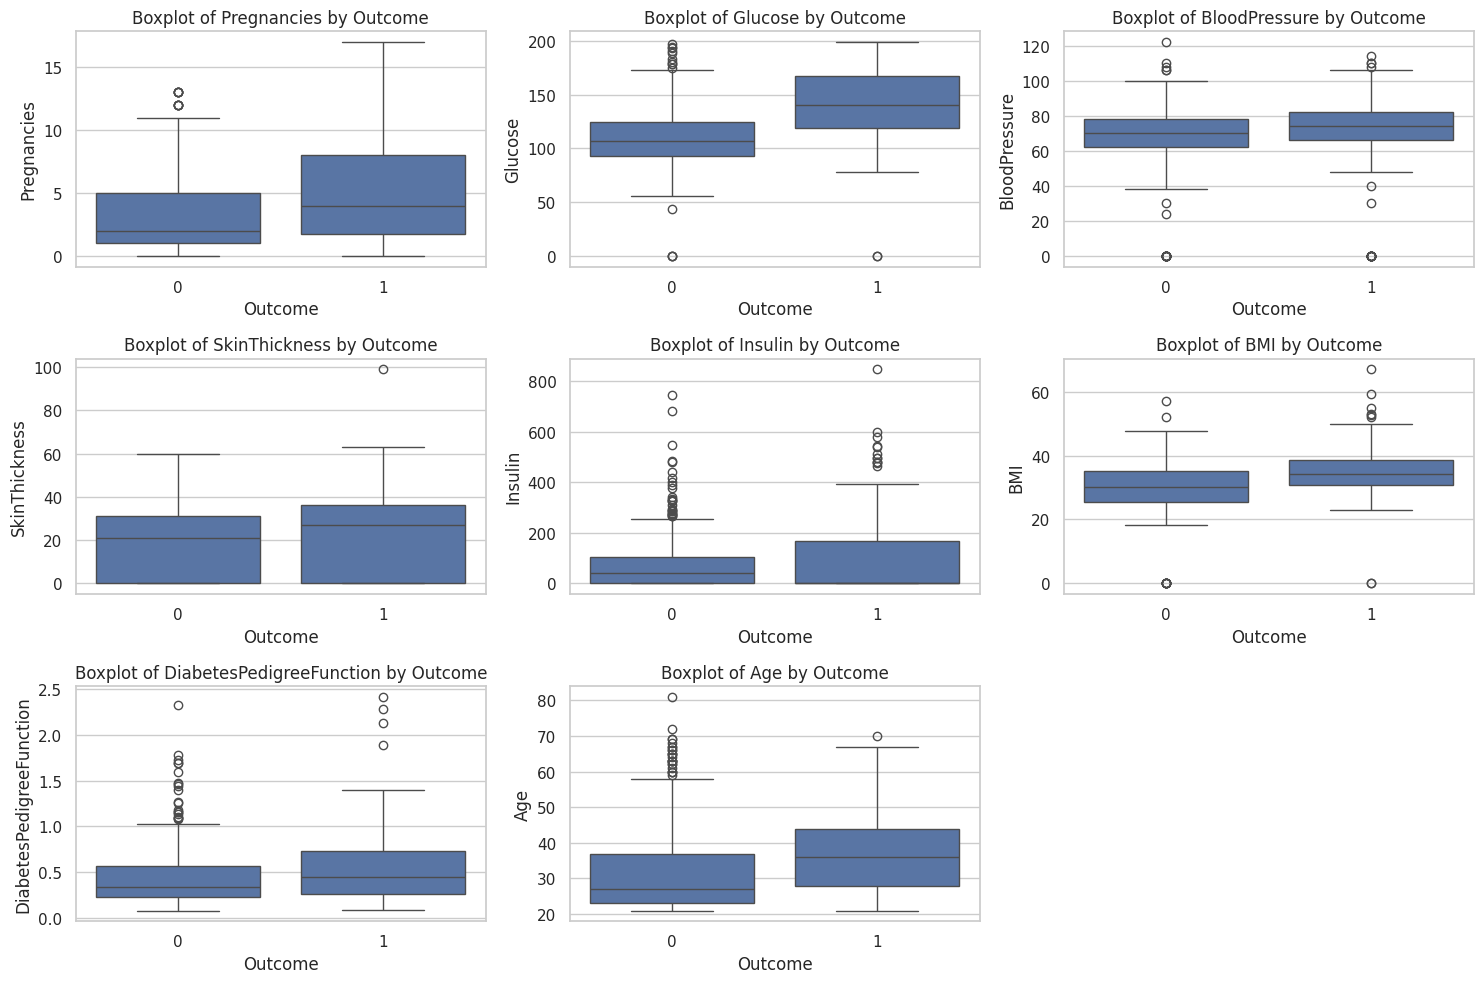

In [39]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(diabetes_dataset.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x="Outcome", y=column, data=diabetes_dataset)
    plt.title(f"Boxplot of {column} by Outcome")
plt.tight_layout()
plt.show()

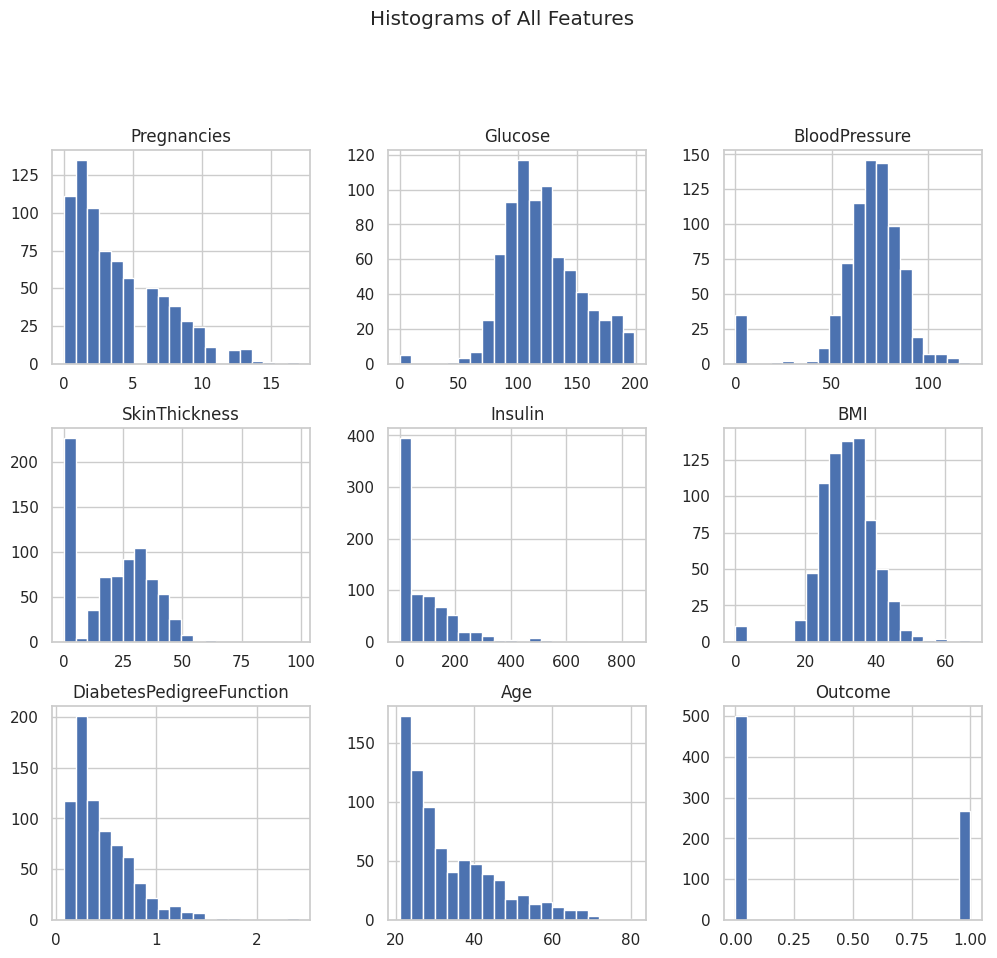

In [40]:
diabetes_dataset.hist(figsize=(12, 10), bins=20)
plt.suptitle("Histograms of All Features", y=1.02)
plt.show()

In [9]:
# separting the data and labels
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [10]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Data standardization


In [12]:
scaler = StandardScaler()
scaler.fit(X)
standardized_Data = scaler.transform(X)
print(standardized_Data)


[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [13]:
X = standardized_Data
Y = diabetes_dataset['Outcome']

In [14]:
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Train-Test split

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


Training the Model

Linear Regression Model

In [42]:
classifier = svm.SVC(kernel='linear')
#training the support vector machine classifier
classifier.fit(X_train, Y_train)
#accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data : ',training_data_accuracy)

Accuracy score of the training data :  0.7866449511400652


In [44]:
#accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data :', test_data_accuracy)


Accuracy score of the test data : 0.7727272727272727


Random Forest Model

In [51]:
# Initialize the model
random_Forest_classifier = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,  # Limiting the depth of the trees
    max_features='sqrt',  # Considering sqrt(number of features) for splits
    min_samples_split=10,  # Minimum number of samples required to split an internal node
    min_samples_leaf=5,  # Minimum number of samples required to be at a leaf node
    random_state=42
)

# Fit the model
random_Forest_classifier.fit(X_train, Y_train)

# Accuracy score on the training data
X_train_prediction = random_Forest_classifier.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

# Accuracy score on the test data
X_test_prediction = random_Forest_classifier.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

print(f"Training Data Accuracy: {training_data_accuracy}")
print(f"Test Data Accuracy: {test_data_accuracy}")

# Perform cross-validation
cv_scores = cross_val_score(random_Forest_classifier, X, Y, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")

Training Data Accuracy: 0.8990228013029316
Test Data Accuracy: 0.7272727272727273
Cross-validation scores: [0.73376623 0.72727273 0.75324675 0.82352941 0.76470588]
Mean cross-validation score: 0.7605042016806722


Decision tree model

In [57]:
# Initialize the Decision Tree classifier with parameters for regularization
dt_model = DecisionTreeClassifier(max_depth=5, min_samples_split=5, min_samples_leaf=2)

# Fit the model on the training data
dt_model.fit(X_train, Y_train)

# Predictions on the training set
train_preds = dt_model.predict(X_train)
train_accuracy = accuracy_score(Y_train, train_preds)

# Predictions on the test set
test_preds = dt_model.predict(X_test)
test_accuracy = accuracy_score(Y_test, test_preds)

print(f"Training Data Accuracy: {train_accuracy}")
print(f"Test Data Accuracy: {test_accuracy}")

Training Data Accuracy: 0.8387622149837134
Test Data Accuracy: 0.7662337662337663


In [93]:
# Define the hyperparameter grid
param_grid = {
     'max_depth': [5, 10, 15, 20, 25, 30, None],  # Increase the range of max_depth
    'min_samples_split': [2, 3, 4, 5, 8, 10, 15],  
    'min_samples_leaf': [1, 2, 3, 4, 5, 10, 15]  
}

# Initialize grid search with cross-validation
grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='accuracy')

# Fit grid search to data
grid_search.fit(X_train, Y_train)

# Get best hyperparameters
best_params = grid_search.best_params_

# Get best model
best_model = grid_search.best_estimator_


# Evaluate best model on test set
test_preds = best_model.predict(X_test)
test_accuracy = accuracy_score(Y_test, test_preds)

print(f"Best Hyperparameters: {best_params}")
print(f"Test Data Accuracy with Best Model: {test_accuracy}")

Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 15, 'min_samples_split': 2}
Test Data Accuracy with Best Model: 0.8051948051948052


Making a Predictive System


In [23]:
input_data = (5,81,46,20,87,29.7,0.169,21)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array as we are prediciting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)


#standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)
prediction = classifier.predict(std_data)
print(prediction)

[[ 0.3429808  -1.24858494 -1.19450074 -0.03365099  0.06252137 -0.29097229
  -0.91472238 -1.04154944]]
[0]


/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [24]:
if (prediction[0]==0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

The person is not diabetic
